# Лабораторная работа 3

Выполнил: Кириллов Данил

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

## Задание 1. Минимизация гладкой функции
1. Рассмотрим все ту же функцию: f(x) = sin(x / 5) exp(x / 10) + 5 exp(-x / 2) на
промежутке [1, 30]
2. Постройте график функции.
3. Изучите примеры использования scipy.optimize.minimize в документации Scipy.
4. Попробуйте найти минимум, используя стандартные параметры в функции
scipy.optimize.minimize (т.е. задав только функцию и начальное приближение).
Попробуйте менять начальное приближение и изучить, меняется ли результат.
5. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых
точных в большинстве случаев градиентных методов оптимизации), запустите
из начального приближения x=2. Градиент функции при этом указывать не
нужно – он будет оценен численно. Полученное значение функции в точке
минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2
знака после запятой.
6. Измените начальное приближение на x=30. Значение функции в точке
минимума - ваш второй ответ по заданию 1, его надо записать через пробел
после первого, с точностью до 2 знака после запятой.

In [77]:
# Заданная функция
def func(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

# Процедура, для отрисовки графиков
def plot_function(x, y, x_label = 'x', y_label = 'f(x)', title = 'График функции f(x)', figsize = (15, 5)):
    plt.figure(figsize=figsize)
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()

LEFT_BORDER = 1
RIGHT_BORDER = 30
SIZE = 1000

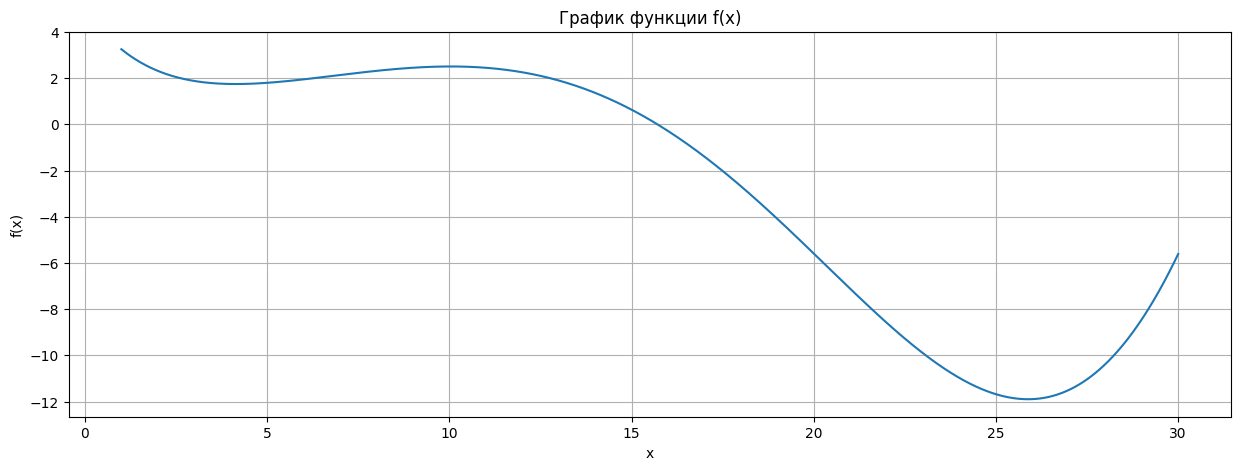

In [78]:
x = np.linspace(LEFT_BORDER, RIGHT_BORDER, SIZE)
y = func(x)

plot_function(x, y)

In [79]:
x0_list = list(range(LEFT_BORDER, RIGHT_BORDER+1, 3))

data = {
    'Начальное приближение' : x0_list,
    'Точка минимума' : [minimize(func, x0).x[0] for x0 in x0_list],
    'Минимум функции' : [minimize(func, x0).fun for x0 in x0_list],
    'Количество итераций' : [minimize(func, x0).nit for x0 in x0_list]
}

df = pd.DataFrame(data)
display(df)

,Начальное приближение,Точка минимума,Минимум функции,Количество итераций
0,1,4.136287,1.745268,7
1,4,4.136257,1.745268,4
2,7,4.136289,1.745268,5
3,10,4.136300,1.745268,3
4,13,88.712036,-6371.765229,4
5,16,25.880199,-11.898895,2
6,19,25.880176,-11.898895,5
7,22,25.880194,-11.898895,6
8,25,25.880186,-11.898895,4
9,28,25.880193,-11.898895,5


In [80]:
data = {
    'Начальное приближение' : x0_list,
    'Точка минимума' : [minimize(func, x0, method='BFGS').x[0] for x0 in x0_list],
    'Минимум функции' : [minimize(func, x0, method='BFGS').fun for x0 in x0_list],
    'Количество итераций' : [minimize(func, x0, method='BFGS').nit for x0 in x0_list]
}

df = pd.DataFrame(data)
display(df)

,Начальное приближение,Точка минимума,Минимум функции,Количество итераций
0,1,4.136287,1.745268,7
1,4,4.136257,1.745268,4
2,7,4.136289,1.745268,5
3,10,4.136300,1.745268,3
4,13,88.712036,-6371.765229,4
5,16,25.880199,-11.898895,2
6,19,25.880176,-11.898895,5
7,22,25.880194,-11.898895,6
8,25,25.880186,-11.898895,4
9,28,25.880193,-11.898895,5


In [81]:
result_1 = minimize(func, 2, method='BFGS').x[0]
result_2 = minimize(func, 30, method='BFGS').x[0]

print(f'Ответ на 1 задание: {result_1:.2f} {result_2:.2f}')

Ответ на 1 задание: 4.14 25.88


## Задание 2. Глобальная оптимизация
Попробуем применить к той же функции f(x) метод глобальной оптимизации
— дифференциальную эволюцию.
1. Изучите документацию и примеры использования функции
scipy.optimize.differential_evolution.
2. Обратите внимание, что границы значений аргументов функции представляют
собой список кортежей (list, в который помещены объекты типа tuple). Даже
если у вас функция одного аргумента, возьмите границы его значений в
квадратные скобки, чтобы передавать в этом параметре список из одного
кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого
списка используется чтобы определить количество аргументов функции.
3. Запустите поиск минимума функции f(x) с помощью дифференциальной
эволюции на промежутке [1, 30]. Полученное значение функции в точке
минимума - ответ в задаче 2. Запишите его с точностью до второго знака после
запятой. В этой задаче ответ - только одно число.
4. Заметьте, дифференциальная эволюция справилась с задачей поиска
глобального минимума на отрезке, т.к. по своему устройству она предполагает
борьбу с попаданием в локальные минимумы.
5. Сравните количество итераций, потребовавшихся BFGS для нахождения
минимума при хорошем начальном приближении, с количеством итераций,
потребовавшихся дифференциальной эволюции. При повторных запусках
дифференциальной эволюции количество итераций будет меняться, но в этом
примере, скорее всего, оно всегда будет сравнимым с количеством итераций
BFGS. Однако в дифференциальной эволюции за одну итерацию требуется
выполнить гораздо больше действий, чем в BFGS. Например, можно обратить
внимание на количество вычислений значения функции (nfev) и увидеть, что у
BFGS оно значительно меньше. Кроме того, время работы дифференциальной
эволюции очень быстро растет с увеличением числа аргументов функции.

In [82]:
borders = [(LEFT_BORDER, RIGHT_BORDER)]

result = differential_evolution(func, borders)

print('Минимум функции:', result.fun)
print('Точка минимума:', result.x[0])
print('Количество итераций:', result.nit)

Минимум функции: -11.898894665953565
Точка минимума: 25.880202690984678
Количество итераций: 5


In [83]:
print(f'Ответ на 2 задание: {result.fun:.2f}')

Ответ на 2 задание: -11.90


## Задача 3. Минимизация негладкой функции
1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е.
теперь каждое значение f(x) приводится к типу int и функция принимает только
целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь
ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3. Найти минимум функции h(x) с помощью BFGS, взяв в качестве начального
приближения x=30. Получившееся значение функции – ваш первый ответ в этой
задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью
дифференциальной эволюции. Значение функции h(x) в точке минимума – это
ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
5. Обратите внимание на то, что полученные ответы различаются. Это
ожидаемый результат, ведь BFGS использует градиент (в одномерном случае –
производную) и явно не пригоден для минимизации рассмотренной нами
разрывной функции. Попробуйте понять, почему минимум, найденный BFGS,
именно такой (возможно в этом вам поможет выбор разных начальных
приближений).
6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции
отличается от глобальной оптимизации, и когда может быть полезно применить
вместо градиентного метода оптимизации метод, не использующий градиент.
Кроме того, вы попрактиковались в использовании библиотеки SciPy для
решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [92]:
def h(x):
    return np.round(np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)).astype(int)

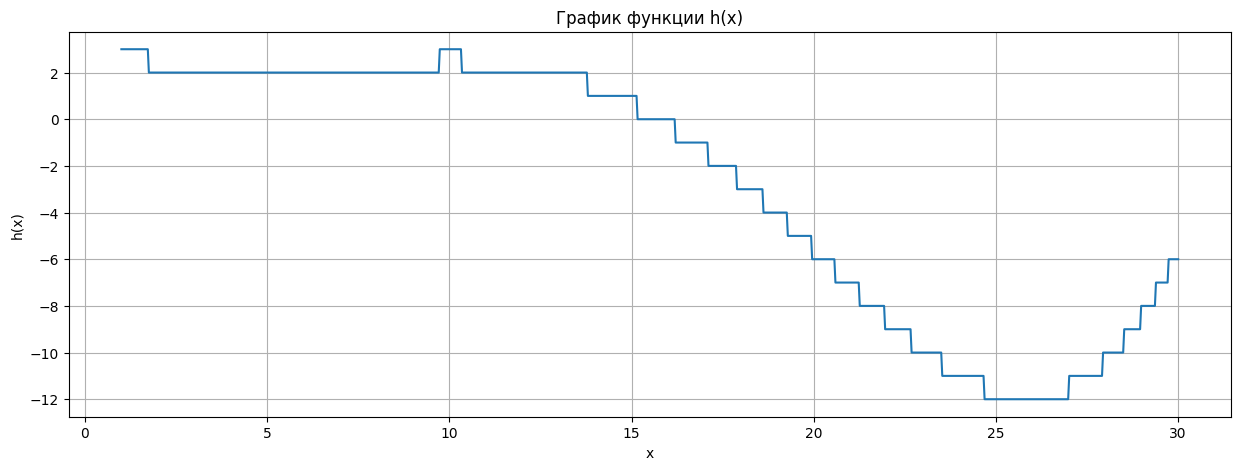

In [93]:
y = h(x)
plot_function(x, y, y_label='h(x)', title='График функции h(x)')

In [94]:
result_1 = minimize(h, 30).x[0]
result_2 = differential_evolution(h, borders).x[0]

print(f'Ответ на 3 задание: {result_1:.2f} {result_2:.2f}')

Ответ на 3 задание: 30.00 25.60
